# Autoencoders for Anomaly Detection

In this Assignment, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). The ECG5000 dataset was created for anomaly detection in the medical space. It provides 20 hours of [Electrocardiogram](https://en.wikipedia.org/wiki/Electrocardiography) (ECG) data - a type of data used to study heart health. Anomalous data is also provided in this dataset which corresponds to an individual with severe congestive heart failure. The dataset is open-source and can be freely used by anyone working on medical devices, and can be used as a starting point to train an anomaly detection model or to create more anomalous data.   








### Import TensorFlow and other libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). You will use a simplified version of the dataset, where each example has been labeled either 0 (corresponding to an abnormal rhythm), or 1 (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.


We will use the **pandas** python library to load our tabular data into a Pandas Dataframe. It contains 4998 rows/data samples and 141 columns. The last column represents the classification label (0 or 1). Therefore, the dataframe has 140 features.

In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


You can use `dataframe.head()` to see the first 5 entries.

In [ ]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Let's look at the columns of the dataframe. It has 141 columns - 140 time intervals, 1 class label.

In [ ]:
# columns of the dataframe - 140 time intervals, 1 class label
dataframe.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='int64', length=141)

## Preprocess Data
Let's extract all the raw voltage values from the dataframe. 'raw_data' is now a 2D numpy array (as opposed to a dataframe i.e., no column names and no row indices).

In [ ]:
# raw ECG voltage values

raw_data = dataframe.values
raw_data.shape

(4998, 141)


Check if the last column contains only 0 and 1 values representing the class labels.

**Hint:** check unique values of the column

In [ ]:
# Confirm that the last column contains the labels - 0 for abnormal, 1 for normal
last_col_unique = np.unique(raw_data[:, -1])

assert (0 in last_col_unique) and (1 in last_col_unique) and len(last_col_unique) == 2

### Split into Data and Labels
In the below cell, split the raw_data into **'data'** containing the voltage values and into **'labels'** containing the labels observed in the above cell.

**Note:** The shape of data should be (4998, 140) and the shape of labels should be (4998,)

**Hint:** Use numpy array slicing.

In [ ]:
# Split raw_data into data and labels
data = raw_data[:, :-1]
labels = raw_data[:, -1]

assert data.shape == (4998, 140) and labels.shape == (4998,)

### Create Train and Test Data and Labels
Now, use 'data' and 'labels' to create separate train and test data & labels. Use the variables - 'train_data', 'test_data', 'train_labels', 'test_labels'. Split 80% into train set and 20% into test set.

**Hint:** Check `sklearn.model_selection` library for an API to achieve this split.

**Note:** Use random_state = 21

In [ ]:
# Split data and labels in train and test sets.
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, random_state=21)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(3998, 140)
(1000, 140)
(3998,)
(1000,)


### Normalize Data
To ensure that all the voltage values are in the same scale, we normalize the train and test data. In the previous tutorials/assignments, we have normaized images to convert the pixel values from [0, 255] to [0, 1].

How would you normalize the continuous tabular values to fall within the range [0, 1]? Could you use the minimum and maximum voltage values? **IMP:** Use the minimum and maximum values of the train dataset to normalize both the train and test dataset.

Normalize the data to `[0,1]` to improve training accuracy.


In [ ]:
# Normalize train_data and test_data to fall within [0, 1]
max_train_val = train_data.max()
min_train_val = train_data.min()
range_train_val = max_train_val - min_train_val

train_data = (train_data - min_train_val) / range_train_val
test_data = (test_data - min_train_val) / range_train_val

print(train_data.max(), train_data.min())
print(test_data.max(), test_data.min())

1.0 0.0
0.821991320413042 -0.0591610161363773


We cast all the values to be float32.

In [ ]:
# Do not change this cell

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

### Create Normal and Anomalous Data

In the next step of data preprocessing, we need to split our train and test data sets into normal and anomalous data sets (each for train and test). To do this, **we will use the labels as a mask.** 'train_labels' and 'test_labels' are both 1D tensors containing 0s and 1s. We will convert them to boolean values such that 'train_labels' and 'test_labels' are now 1D tensor masks containing False (0) and True (1) values instead.  

In [ ]:
print("train_labels:", train_labels[:10])
print("test_labels:", test_labels[:10])

train_labels_mask= train_labels.astype(bool)     # mask with Trues and Falses
test_labels_mask = test_labels.astype(bool)       # mask with Trues and Falses

print()
print("train_labels mask:", train_labels_mask[:10])
print("test_labels mask:", test_labels_mask[:10])

train_labels: [1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
test_labels: [1. 0. 1. 1. 0. 1. 1. 1. 0. 1.]

train_labels mask: [ True  True  True False  True  True  True False  True  True]
test_labels mask: [ True False  True  True False  True  True  True False  True]


We use these masks to create a normal train and test dataset and anomalous train and test dataset.

In the cell below, we create the normal train and test datasets using the the two masks defined above. 'normal_train_data' contains samples from train_data whose indices are True i.e., class 1! It works similarly for normal_test_data.

In [ ]:
normal_train_data = train_data[train_labels_mask] # healthy train data - class 1
normal_test_data = test_data[test_labels_mask]    # healthy test data - class 1

Similarly, use the masks to create anomalous train and test datasets.

**Hint:** Extract data samples where the indices are False

In [ ]:
# Create anomalous train and test datasets using the two masks
anomalous_train_data = train_data[~train_labels_mask] # ANOMALOUS train data - class 0
anomalous_test_data = test_data[~test_labels_mask]    # ANOMALOUS test data - class 0

In [ ]:
print("train_data.shape", train_data.shape)
print("normal_train_data.shape", normal_train_data.shape)
print("anomalous_train_data.shape", anomalous_train_data.shape)
print()
print("test_data.shape", test_data.shape)
print("normal_test_data.shape", normal_test_data.shape)
print("anomalous_test_data.shape", anomalous_test_data.shape)

train_data.shape (3998, 140)
normal_train_data.shape (2359, 140)
anomalous_train_data.shape (1639, 140)

test_data.shape (1000, 140)
normal_test_data.shape (560, 140)
anomalous_test_data.shape (440, 140)


### Create Combined Train Dataset

In our final step of data preprocessing, we mix in some of the anomalous data into the training set.

In the below cell, create 'combined_train_data' that contains all samples from normal_train_data followed by 'n' samples from anomalous_train_data such that the 'n' samples added from anomalous_train_data accounts for 10% of 'combined_train_data'.

Since the majority of the training data is still normal data, we can still train a high performing model as long as we don't overfit to the training data.

In [ ]:
# Create combined_train_data
n = int(normal_train_data.shape[0]/9.0)

combined_train_data = np.vstack((normal_train_data, anomalous_train_data[:n]))

combined_train_data.shape

(2621, 140)

**Hint:** Combined data shape should be around ~ (2621, 140)

### Visualize ECG Signal

In the below cell, we plot a normal ECG signal.

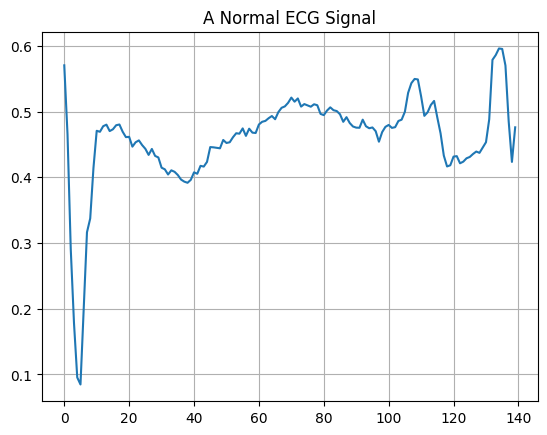

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG Signal")
plt.show()

In the below cell, plot an anomalous ECG signal.

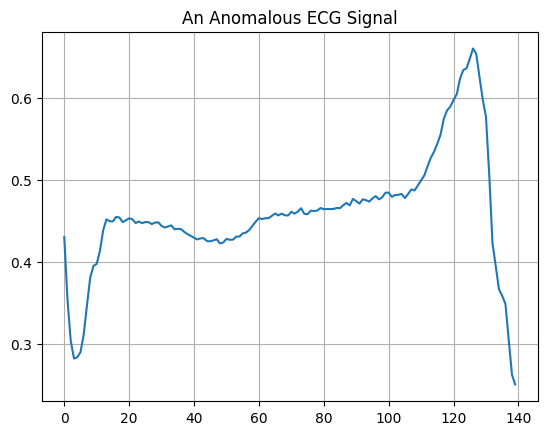

In [ ]:
# Plot an anomalous ECG Signal
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG Signal")
plt.show()

### Build the Autoencoder Model

In the cell below, we define an autoencoder model that contains an encoder and decoder unit. When this model is run on an input data sample, the encoder and decoder layers are applied to the input to generate a reconstructed data sample.

Choose a value for **EMBEDDING_SIZE** i.e., the number of neurons in the smallest layer. **Remember**, since we have to create a bottleneck between the encoder and decoder units, the size of the embedding has to be lesser than or equal to the number of units in the previous layer.

Experiment with the **EMBEDDING_SIZE** hyperparamter to achieve the highest accuracy **in the end** (Later in the notebook - sections where we choose a threshold). We were able to get ~ 94% accuracy.



In [ ]:
EMBEDDING_SIZE =  2

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),               # encoder layer 1
      layers.Dense(EMBEDDING_SIZE, activation="relu")]) # encoder layer 2 - Smallest Layer Defined Here

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),               # decoder layer 1
      layers.Dense(140, activation="sigmoid")])         # decoder layer 2

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()
print("Chosen Embedding Size: ", EMBEDDING_SIZE)

Chosen Embedding Size:  2


In the below cell, compile the model with the Adam optimizer and the Mean Absolute Error Loss. Set the initial learning rate for the optimizer as 0.01.

In [ ]:
# Define Optimizer and Loss Function
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mae'
)

### Train the model

The autoencoder is now trained using the combined training data which is primarily normal ECGs with some anomalies mixed in.

For validation, we use the full test dataset that contains normal and anomalois ECG Signals.

In [ ]:
history = autoencoder.fit(combined_train_data, combined_train_data, epochs=50,
                          batch_size=512, validation_data=(test_data, test_data), shuffle=True)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 937ms/step - loss: 0.0554 - val_loss: 0.0463
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0456 - val_loss: 0.0414
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - val_loss: 0.0393
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - val_loss: 0.0390
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - val_loss: 0.0386
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - val_loss: 0.0373
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - val_loss: 0.0359
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - val_loss: 0.0351
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0345
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - val_loss: 0.0342
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - val_loss: 0.0339
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - val_loss: 0.0336
Epoch 13/50

### Plot Train and Test Loss.

In the below cell, plot the train loss and validation loss on the same plot. Add a legend.

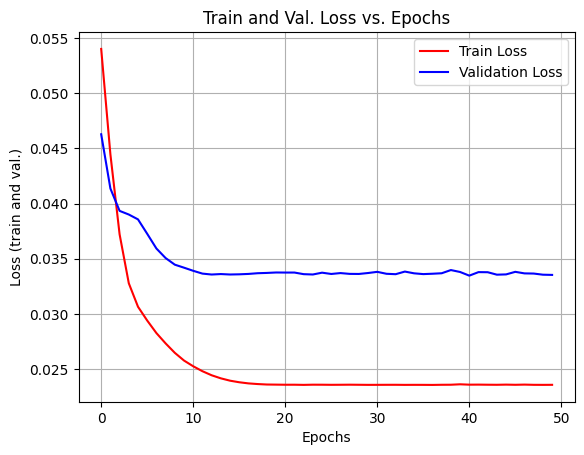

In [ ]:
# Plot train and validation loss.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = history.epoch

plt.grid()
plt.plot(epoch_range, train_loss, 'r', label = "Train Loss")
plt.plot(epoch_range, val_loss, 'b', label = "Validation Loss")
plt.title("Train and Val. Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (train and val.)")
plt.legend()
plt.show()

### Evaluation of Autoencoder Model

In this section we will classify a test ECG as anomalous or normal. The criteria depends on the reconstruction error between the reconstructed (encoded and decoded) ECG signal and the actual signal. If the reconstruction error of the test data sample is greater than a threshold reconstruction error, it will be considered anomalous, if lesser, it will be considered normal.




How do we determine this threshold reconstruction error value? We will explore two methods to do this. Before we move on to picking a threshold value, let's plot a normal ECG from the training set, the reconstructed signal after it's encoded and decoded by the autoencoder, and the reconstruction error.

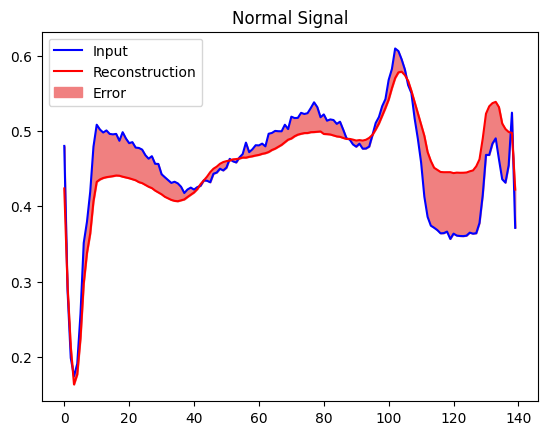

In [ ]:
# Run our model on the normal test dataset to get reconstructed normal data samples.
encoded_signal = autoencoder.encoder(normal_test_data).numpy()
decoded_signal = autoencoder.decoder(encoded_signal).numpy()


# plot normal_test_data against the decoed_siganal (i.e., the reconstructed normal_test_data)
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_signal[0],'r')
plt.fill_between(np.arange(140), decoded_signal[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title('Normal Signal')
plt.show()

Create a similar plot, this time for an anomalous test example.

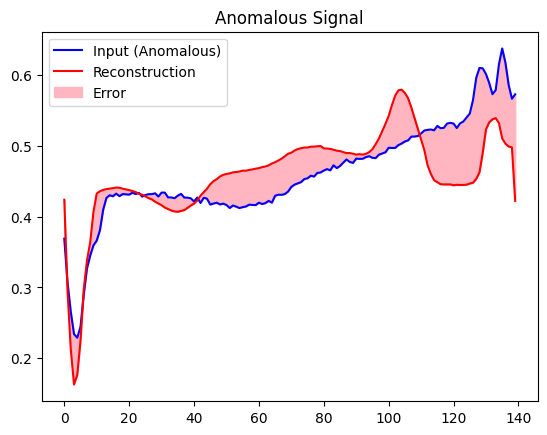

In [ ]:
# Plot anomalous_test_data vs reconstructed anomalous_test_data
encoded_signal = autoencoder.encoder(anomalous_test_data).numpy()
decoded_signal = autoencoder.decoder(encoded_signal).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_signal[0],'r')
plt.fill_between(np.arange(140), decoded_signal[0], anomalous_test_data[0], color='lightpink')
plt.legend(labels=["Input (Anomalous)", "Reconstruction", "Error"])
plt.title('Anomalous Signal')
plt.show()

### Picking a Threshold to Detect Anomalies - Method 1


How do we define this threshold value? In this section, we will explore two different ways to determine this threshold value.




In **Method 1**,  we will determine the threshold from the normal train data. You will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the mean of the normal training examples.

In the below cell, we plot the reconstruction error on normal ECGs from the training set.

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


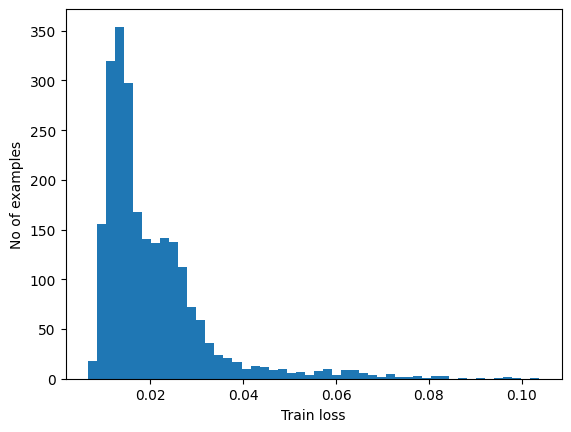

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In the below cell, choose a threshold value that is one standard deviation above the mean of the train_loss. Print this threshold.

In [ ]:
# Calculate threshold
mean_loss = np.mean(train_loss)
std_loss = np.std(train_loss)
threshold = mean_loss + std_loss

print("Threshold: ", threshold)

Threshold:  0.032923874



In the below cells, we calculate and print the Accuracy, Precision, Recall on the test data. Complete the functions - 'predict()' and 'print_stats()'.

**Hint:** Look at the `sklearn.metrics` library to find the appropriate APIs to calculate Accuracy, Precision, and Recall.

In [ ]:
# Complete the below two functions
# import any APIs you would require

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

def predict(model, data, threshold):
    '''
    From the model and data, get your reconstructed data. Then calculate the MAE loss between the reconstrcuted data
    and original data. Then create a mask where loss < threshold


    input:
        model - autoencoder model
        data  - test_data
        threshold - threshold

    output:
        preds - mask where loss is less than threshold
    '''
    reconstructed_data = model.predict(data)
    mae_loss = tf.keras.losses.mae(reconstructed_data, data)

    preds = mae_loss < threshold

    return preds



def print_stats(predictions, labels):
    '''
    Given the predictions and labels, print the Accuracy, Precision, and Recall scores.

    input:
        predictions - mask of predictions containing True and False values
        labels      - test_labels containing 1s and 0s

    output:
        None

    '''
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)


We were able to get ~ 94% accuracy below. Try experimenting with the **EMBEDDING_SIZE** hyperparamter if you aren't able to achieve this accuracy.

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy:  0.945
Precision:  0.9922027290448343
Recall:  0.9089285714285714



Try to maximize the accuracy, precision, and recall. Think about the application and the consequences of a false positive and a false negative.

[More details on precision and recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

### Picking a Threshold to Detect Anomalies - Method 2 using ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*   True Positive Rate
*  False Positive Rate


The Receiver Operating Characteristic (ROC) plot allows us to visualize the tradeoff between predicting anomalies as normal (false positives) and predicting normal data as an anomaly (false negative). Normal rhythms are labeled as `1` in our dataset but we have to flip them here to match the ROC curves expectations. You can learn more about the API [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).


The ROC plot has threshold values plotted on their corresponding points on the curve to aid in selecting a theshold for the application.

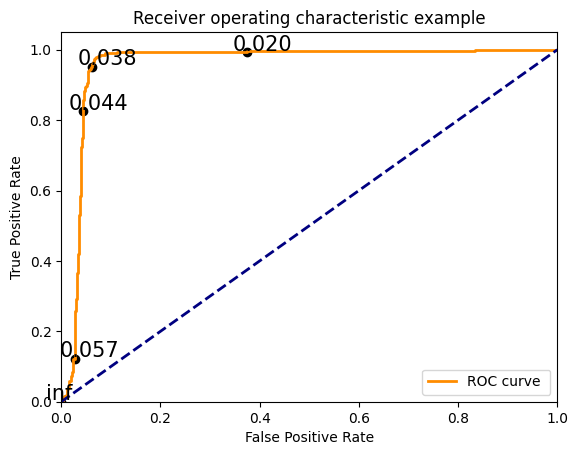

In [ ]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)
fpr = []     # false positive
tpr = []     # true positive

# the test labels are flipped to match how the roc_curve function expects them.
flipped_labels = 1 - test_labels
fpr, tpr, thresholds = roc_curve(flipped_labels, loss)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# plot some thresholds
thresholds_every=20
thresholdsLength = len(thresholds)
colorMap=plt.get_cmap('jet', thresholdsLength)
for i in range(0, thresholdsLength, thresholds_every):
  threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
  plt.scatter(fpr[i], tpr[i], c='black')
  plt.text(fpr[i] - 0.03, tpr[i] + 0.005, threshold_value_with_max_four_decimals, fontdict={'size': 15});

plt.show()


If your model does well in diferentiating normal rhythms from abnormal ones, you should be able to pick a clear threshold value from the above ROC Curve - a value that would give us a **high true positive rate (TPR)** and **low false positive rate (FPR)** that is at the 'knee' of the curve.



In the below cell, pick your best guess of the threshold value from the ROC Curve and then call the two defined functions again to print Accuracy, Precision, and Recall.

In [ ]:
# Choose threshold value and call helper functions
my_threshold_guess = 0.037

preds = predict(autoencoder, test_data, my_threshold_guess)
print_stats(preds, test_labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy:  0.949
Precision:  0.9739292364990689
Recall:  0.9339285714285714


### AUC Metrics

What if we wanted to compare the performance of models without factoring in the threshold? Simply comparing the accuracy won't work since that depends on the threshold you pick and that won't have the same impact across models.

Instead we can measure the area under the curve (AUC) in the ROC plot. AUC provides an aggregate measure of performance across all possible classification thresholds. One way to interpret the AUC metric is as the probability that the model ranks a random positive example more highly than a random negative example.

In general the AUC is a useful metic for comparison as it is threshold invariant *and* scale invariant. This metric is very useful for evalutation of a specfic model design. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In the below cell, calculate and print the AUC Score.

**Hint:** Look at the `sklearn.metrics` library to find the appropriate API to calculate AUC.

In [ ]:
# Calculate and print the AUC metric.
fpr, tpr, thresholds = roc_curve(flipped_labels, loss)
auc_score = auc(fpr, tpr)

print(auc_score)

0.960304383116883
